In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [3]:
LoanData = pd.read_csv("Loan Data 2.csv")

In [4]:
LD = LoanData[LoanData!= '..']
LD1 = LD.dropna()
LD1.head()
LD1.info()
LD1.describe()
LD1.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41336 entries, 0 to 41401
Data columns (total 21 columns):
Loan Amount                  41336 non-null int64
Funded Amouint               41336 non-null int64
Term                         41336 non-null object
Interest Rate                41336 non-null object
Installment                  41336 non-null float64
Employment Length            41336 non-null object
Home Ownership               41336 non-null object
Annual Income                41336 non-null float64
Approved Date                41336 non-null int64
Loan Status                  41336 non-null object
Purpose                      41336 non-null object
Borrower's State             41336 non-null object
DTI                          41336 non-null float64
Delinquencies last 2-yrs     41336 non-null float64
Earliest Credit Line         41336 non-null object
# Inquiries last 6 months    41336 non-null float64
Open Accounts                41336 non-null float64
Revolving Balance    

/Users/dennisblarsen/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Index(['Loan Amount', 'Funded Amouint', 'Term', 'Interest Rate', 'Installment',
       'Employment Length', 'Home Ownership', 'Annual Income', 'Approved Date',
       'Loan Status', 'Purpose', 'Borrower's State', 'DTI',
       'Delinquencies last 2-yrs', 'Earliest Credit Line',
       '# Inquiries last 6 months', 'Open Accounts', 'Revolving Balance',
       'Revolving %', 'Total # of Accounts', 'Total Debt Owed'],
      dtype='object')

In [59]:
#LD1['Term'] = pd.to_timedelta(1, unit='M')
#LD1['Interest Rate'].astype(str).astype(int)
LD1['Interest Rate'] = LD1['Interest Rate'].str.rstrip('%').astype('float') / 100.0

/Users/dennisblarsen/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
LD1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41336 entries, 0 to 41401
Data columns (total 21 columns):
Loan Amount                  41336 non-null int64
Funded Amouint               41336 non-null int64
Term                         41336 non-null timedelta64[ns]
Interest Rate                41336 non-null float64
Installment                  41336 non-null float64
Employment Length            41336 non-null object
Home Ownership               41336 non-null object
Annual Income                41336 non-null float64
Approved Date                41336 non-null int64
Loan Status                  41336 non-null object
Purpose                      41336 non-null object
Borrower's State             41336 non-null object
DTI                          41336 non-null float64
Delinquencies last 2-yrs     41336 non-null float64
Earliest Credit Line         41336 non-null object
# Inquiries last 6 months    41336 non-null float64
Open Accounts                41336 non-null float64
Revolving B

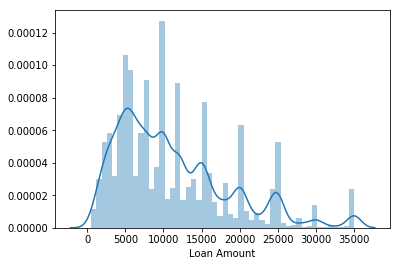

In [52]:
sns.distplot(LD1['Loan Amount'])

In [61]:
LD2 = LD1.corr()

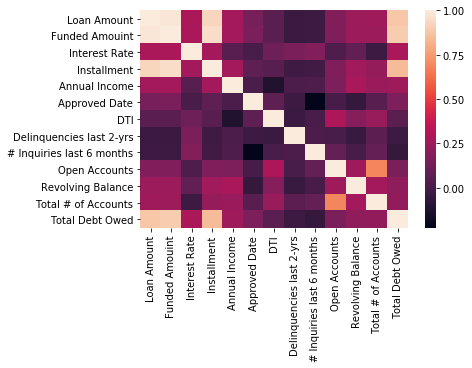

In [62]:
sns.heatmap(LD2)

In [55]:
X = LD1[['Funded Amouint', 'Installment', 'Annual Income','Loan Amount'
               , 'Delinquencies last 2-yrs','# Inquiries last 6 months', 'Open Accounts', 'Revolving Balance',
         'Total # of Accounts', 'Total Debt Owed']]
y = LD1['DTI']
print(X.shape, y.shape)

(41336, 10) (41336,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000)

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train,y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.14975167321776806
Testing Score: 0.16094522200180061


In [25]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [ 5.70160843e-05 -3.17180036e-03 -2.15606287e-05  8.35583771e-06
 -4.67761891e-01 -1.43684238e-02  3.45703992e-01  4.82242749e-05
  5.20841695e-02  3.32832710e-05]
y-axis intercept:  9.786922837014004


In [23]:
predictions = model.predict(X_test)

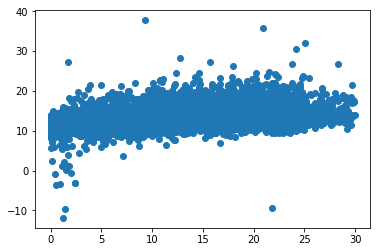

In [24]:
plt.scatter(y_test,predictions)

In [34]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [35]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [40]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................


/Users/dennisblarsen/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/dennisblarsen/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'continuous'